# DATA ANALYSIS PROJECT USING PYTHON#

*This is my First Data science project and i will analysing Covid-19 Data in india.I will be explaining every code bit by bit.*

The first step is to import libraries that i will be using in my analysis.

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
#style.use("ggplot")
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
#to set the size of the fisures that will be created.
plt.rcParams["figure.figsize"]=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import folium

In [24]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

I will go ahead and read the dataset that i will analysing. My dataset is in the form of an excel sheet, but you can read any datase in any form.

In [3]:
# Reading data.
dfindia=pd.read_excel("Covidcasesindia.xlsx")

In [4]:
# Disaplaying the data.
dfindia.head(10)

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


The Data will be read changed into a dataframe and so it will have indexes. Since there is also serial numbers in my data, i will drop that column to remain with indexes.

In [5]:
# Dropping the S.No. column
dfindia.drop(["S. No."],axis=1, inplace=True)

In [6]:
#Displaying the last fives rows in our data frame.
dfindia.tail()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
21,West Bengal,11,0,0,1
22,Bihar,7,0,0,1
23,Mizoram,1,0,0,0
24,Goa,6,0,0,0
25,Manipur,1,0,0,0


Now i will create a new column which will show the total number cases in each state,i.e the total confirmed cases(india national) plus total confirmed cases(Foreign national).

In [7]:
#Creating a new column by adding two columns.
dfindia["Total cases"]=dfindia["Total Confirmed cases (Indian National)"]+dfindia["Total Confirmed cases ( Foreign National )"]

In [8]:
#Displaying the data with the new column.
dfindia

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


In [9]:
Total_cases_overall=dfindia["Total cases"].sum()
print("The Total number of cases in India is",Total_cases_overall)

The Total number of cases in India is 729


Now we will add another column which will display the active cases in each state. We wil subtract the death cases plus cured cases from the number of total cases to get the number of active cases.

In [10]:
#Adding a new column
dfindia["Active cases"]=dfindia["Total cases"]-(dfindia["Death"]+dfindia["Cured"])

In [11]:
dfindia

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Active cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


You can display your dataframe so that someone can easily see the highest and lowest valuse in a column. Using a pandas inbuilt function this is possible.

In [12]:
#Adding colors with varying intensity from the highest to the lowest in each column.
dfindia.style.background_gradient(cmap="Reds")

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Active cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


Now we can choose a certain column from the datafrmae and analyise it separately.This is possible using the function in pandas known as groupby. The function to_frame() it displays our column as a dataframe.

In [13]:
Total_Active_cases=dfindia.groupby("Name of State / UT")["Active cases"].sum().sort_values(ascending=False).to_frame()

In [14]:
Total_Active_cases

,Active cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [15]:
##Adding colors with varying intensity from the highest to the lowest in the column.
Total_Active_cases.style.background_gradient(cmap="Reds")

,Active cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


# GRAPHICAL REPRESENTATION#

You can do visualisation using pandas built in functions. We are going to begin by exploring that first.

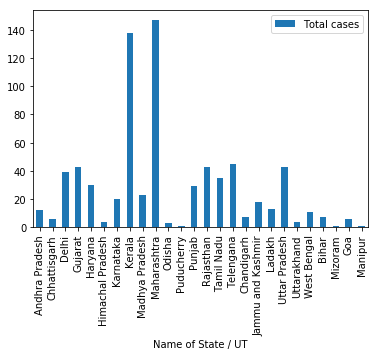

In [16]:
#Using Pandas inbuilt function we can plot any kind of graph.
dfindia.plot(kind="bar",x="Name of State / UT",y="Total cases")

Now we will do avisualisation using matplotlib and see the difference between matplotlib and pandas.

<BarContainer object of 26 artists>

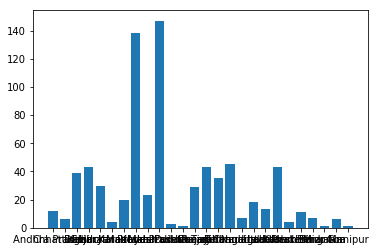

In [17]:
#visualization using matplotlib
plt.bar(dfindia["Name of State / UT"],dfindia["Total cases"])

There is adifference between the figure produced by pandas visualisation and matplotlib visualisation. For pandas it was well arranged but for matplotlib you should use object oriented matlab to control the figure. 
We will now visualise using plotly to compare and see.

In [18]:
#Visualisation using plotly.
dfindia.iplot(kind="bar",x="Name of State / UT",y="Total cases")

There is vast difference between matplotlib, pandas and plotly. The figure plotted by plotly has amny faetures which acn make your analysis easier.
Now we will plot using plotly express and also compare and see.

In [25]:
px.bar(dfindia,x="Name of State / UT",y="Total cases")

Plotly works behind plotly express and this makes plotly express much easier to use and with many features.

Now we will visualize using scatter plots and see the difference with the bar plots.

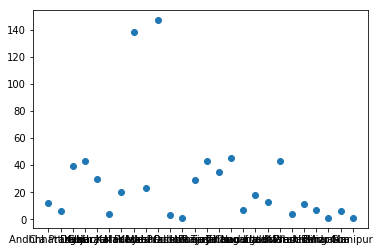

In [20]:
plt.scatter(dfindia["Name of State / UT"],dfindia["Total cases"])

In [21]:
#Visualizing using scatter plot in plotly.
dfindia.iplot(kind="scatter",x="Name of State / UT",y="Total cases",mode="markers",title="Scatter plot graph",colors="red",size=9)

Scatter plots in plotly represent our data well with many features that make analysis very easy. Now we will compare with plotly express and get to see the difference  between the three.

In [22]:
#ploting scatter plot using plotly express.
px.scatter(dfindia,x="Name of State / UT",y="Total cases")

In [23]:
So far we have seen that you can analyise data using three libraries, namely;panadas- built in functions, matplotlib, plotly and plotly express.
Now we will use object oriented matlab for matplotlib and plotly.

SyntaxError: invalid syntax (<ipython-input-23-46dbec3439bd>, line 1)

In [ ]:
#Object oriented visualization for matplotlib
fig=plt.figure(figsize=(20,10))
axes=fig.add_axes([0,0,1,1])
axes.bar(dfindia["Name of State / UT"],dfindia["Total cases"])
axes.set_title("Total cases in Indai")
axes.set_xlabel("Name of State / UT")
axes.set_ylabel("Total cases")
plt.show()

In [ ]:
#Object oriented visualization in plotly.
fig=go.Figure()
fig.add_trace(go.Bar(x=dfindia["Name of State / UT"],y=dfindia["Total cases"]))
fig.update_layout(title="Total cases in Indai",xaxis=dict(title="Name of State / UT"),yaxis=dict(title="Total cases"))

So far we have done Data analysis first in numerical form and the in grapgical representation. Under graphical representation we compared different libraries to see the one which is easier to use in aanalysis but you are advised to have knowledge in all of them.